# 毕业论文`GRAD`
## 计算贡献值

---
*@author: Evan*\
*@date: 2023-12-19*

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy import stats

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

* 观测值的summer与autumn之差包含了MET与EMIS的作用；
* 模拟的summer和试验之差，代表的MET的作用
* 模拟的autumn和试验之差，代表了EMIS的作用

In [2]:
datapath = datadir + 'Contribution/Seasonally/contribution_hours_Seasonally/'
df_summer = pd.read_excel(datapath + 'summer.xlsx',index_col=0)
df_autumn = pd.read_excel(datapath + 'autumn.xlsx',index_col=0)
df_sensit = pd.read_excel(datapath + 'sensit.xlsx',index_col=0)

In [3]:
df_summer

,sim_2019,obs_2019,sim_2021,obs_2021,sim_2022,obs_2022
2023-07-01 00:00:00,69.926414,30.333333,52.710552,37.525000,38.281609,19.871795
2023-07-01 01:00:00,66.185638,29.555556,50.979946,37.000000,37.330921,19.948052
2023-07-01 02:00:00,63.311085,26.611111,49.147179,36.412500,38.142834,21.666667
2023-07-01 03:00:00,60.357597,22.962963,46.836723,35.875000,39.621162,22.662162
2023-07-01 04:00:00,57.655926,20.358491,44.864399,35.487179,40.639435,22.605263
...,...,...,...,...,...,...
2023-07-31 19:00:00,55.146336,21.090909,101.495392,71.202532,139.062119,184.307692
2023-07-31 20:00:00,52.783115,20.821429,90.222824,56.612500,122.131424,151.641026
2023-07-31 21:00:00,51.580044,20.821429,80.706001,44.139241,108.405258,122.974026
2023-07-31 22:00:00,51.584473,22.357143,72.802841,38.734177,95.622078,101.934211


In [4]:
# calculate MDA8
mda8_summer = df_summer.rolling(8).mean().resample('D').max()
avg_summer = mda8_summer.mean(axis=0)
mda8_autumn = df_autumn.rolling(8).mean().resample('D').max()
avg_autumn = mda8_autumn.mean(axis=0)
mda8_sensit = df_sensit.rolling(8).mean().resample('D').max()
avg_sensit = mda8_sensit.mean(axis=0)

In [5]:
print(avg_summer)
print(avg_autumn)
print(avg_sensit)

sim_2019    120.747709
obs_2019     83.197922
sim_2021    121.256671
obs_2021     98.166182
sim_2022    124.746466
obs_2022    102.445243
dtype: float64
sim_2019    156.101873
obs_2019    154.611629
sim_2021    141.569717
obs_2021    124.396497
sim_2022    169.676331
obs_2022    161.912303
dtype: float64
sim_2019    157.063143
sim_2021    141.231030
sim_2022    172.915578
dtype: float64


In [6]:
obs_list = ['obs_2019','obs_2021','obs_2022']
sim_list = ['sim_2019','sim_2021','sim_2022']
sen_list = sim_list

obs_summer = avg_summer[obs_list].mean()
obs_autumn = avg_autumn[obs_list].mean()
sim_summer = avg_summer[sim_list].mean()
sim_autumn = avg_autumn[sim_list].mean()
sen_autumn = avg_sensit[sen_list].mean()

print('obs_summer  = ',obs_summer,
      '\nobs_autumn = ',obs_autumn,
      '\nsim_summer  = ',sim_summer,
      '\nsim_autumn = ',sim_autumn,
      '\nsen_autumn = ',sen_autumn)

obs_summer  =  94.60311566796946 
obs_autumn =  146.9734766306779 
sim_summer  =  122.25028186716058 
sim_autumn =  155.7826404147678 
sen_autumn =  157.06991670396593


In [7]:
delta_obs           = obs_autumn - obs_summer
delta_summer_with_sen  = sen_autumn - sim_summer
delta_autumn_with_sen = sim_autumn - sen_autumn

print('ΔMET + ΔEMIS = {:.2f}'.format(delta_obs),
      '\nΔMET = {:.2f}'.format(delta_summer_with_sen),', {:.2f}%'.format(delta_summer_with_sen/delta_obs*100),
      '\nΔEMIS = {:.2f}'.format(delta_autumn_with_sen),', {:.2f}%'.format(delta_autumn_with_sen/delta_obs*100))

ΔMET + ΔEMIS = 52.37 
ΔMET = 34.82 , 66.49% 
ΔEMIS = -1.29 , -2.46%


直接对原数据做计算结果太差，要做线性回归

发现日间夜间均偏高，没有必要分两段时间做回归\
同时发现summer年份的模拟偏高更严重，因此应该分summer与autumn做两段回归

In [8]:
sim_summer = df_summer[sim_list].mean(axis=1)
obs_summer = df_summer[obs_list].mean(axis=1)
sim_autumn = df_autumn[sim_list].mean(axis=1)
obs_autumn = df_autumn[obs_list].mean(axis=1)
sim_sensit = df_sensit[sen_list].mean(axis=1)

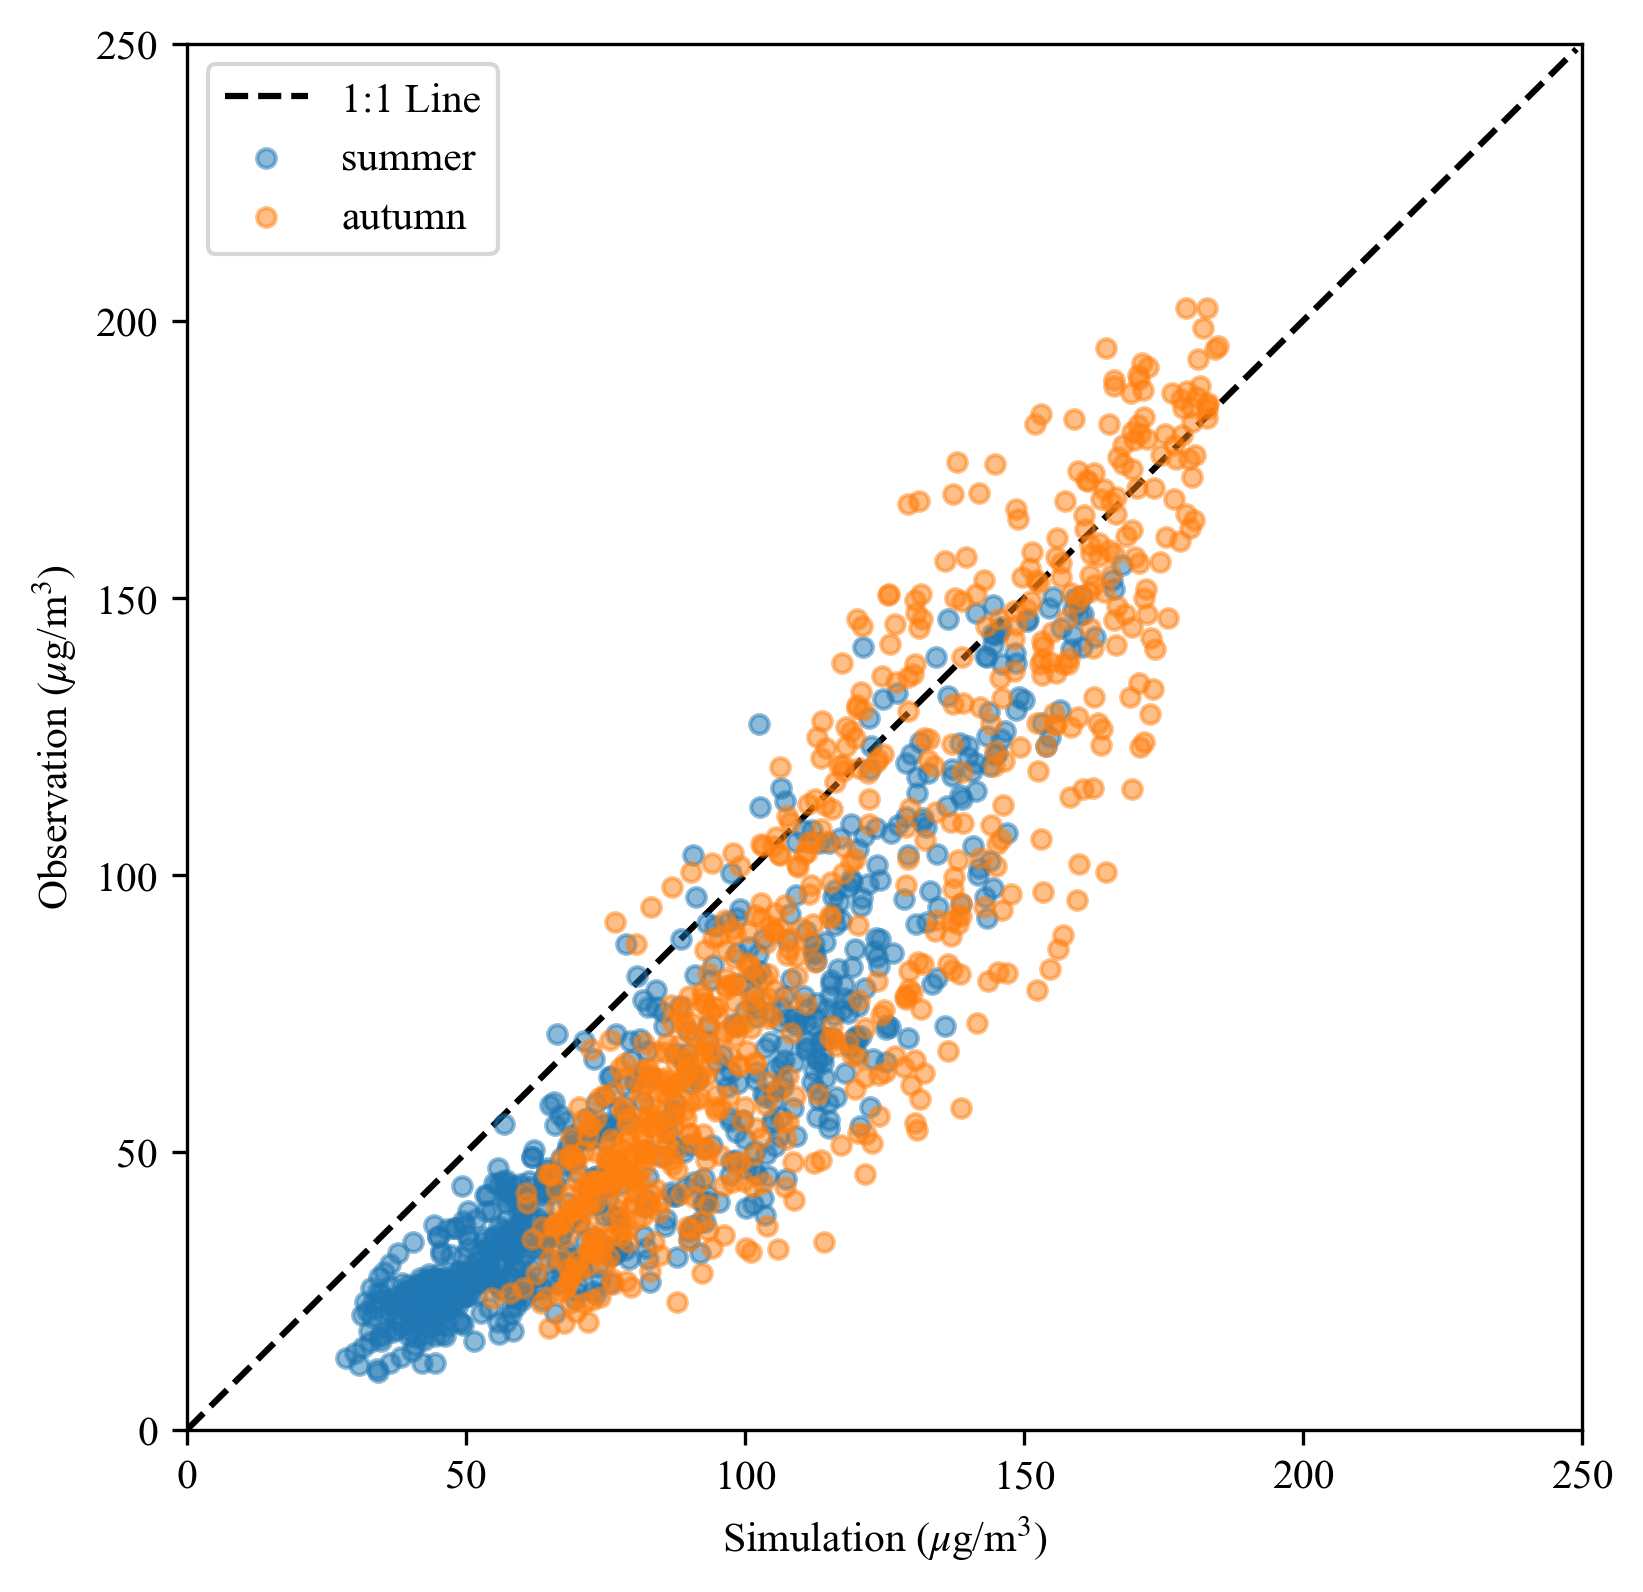

In [9]:
fig = plt.figure(figsize=(6, 6),dpi=300)
ax = fig.add_subplot(111)
ax.plot(np.arange(0,250),np.arange(0,250),'k--',zorder=0,label='1:1 Line')
ax.scatter(sim_summer.values, obs_summer.values,label='summer',color='tab:blue',s=20, marker='o',alpha=0.5)
ax.scatter(sim_autumn.values, obs_autumn.values,label='autumn',color='tab:orange',s=20, marker='o',alpha=0.5)
ax.set_xlim(0,250)
ax.set_ylim(0,250)
ax.set_xlabel('Simulation ($\mu$g/m$^3$)')
ax.set_ylabel('Observation ($\mu$g/m$^3$)')
ax.legend()
plt.show()

In [10]:
slope_summer, intercept_summer, r_value_summer, p_value_summer, std_err_summer = stats.linregress(sim_summer,obs_summer)
slope_autumn, intercept_autumn, r_value_autumn, p_value_autumn, std_err_autumn = stats.linregress(sim_autumn,obs_autumn)

lr_data = {
    'summer': [slope_summer, intercept_summer, r_value_summer, p_value_summer, std_err_summer],
    'autumn': [slope_autumn, intercept_autumn, r_value_autumn, p_value_autumn, std_err_autumn],
}

lr = pd.DataFrame(lr_data, index=['slope', 'intercept', 'r_value', 'p_value', 'std_err'])
lr

,summer,autumn
slope,9.257041e-01,1.217038e+00
intercept,-1.981485e+01,-4.808473e+01
r_value,9.106764e-01,8.925800e-01
p_value,4.325445e-287,1.396303e-250
std_err,1.541640e-02,2.294376e-02


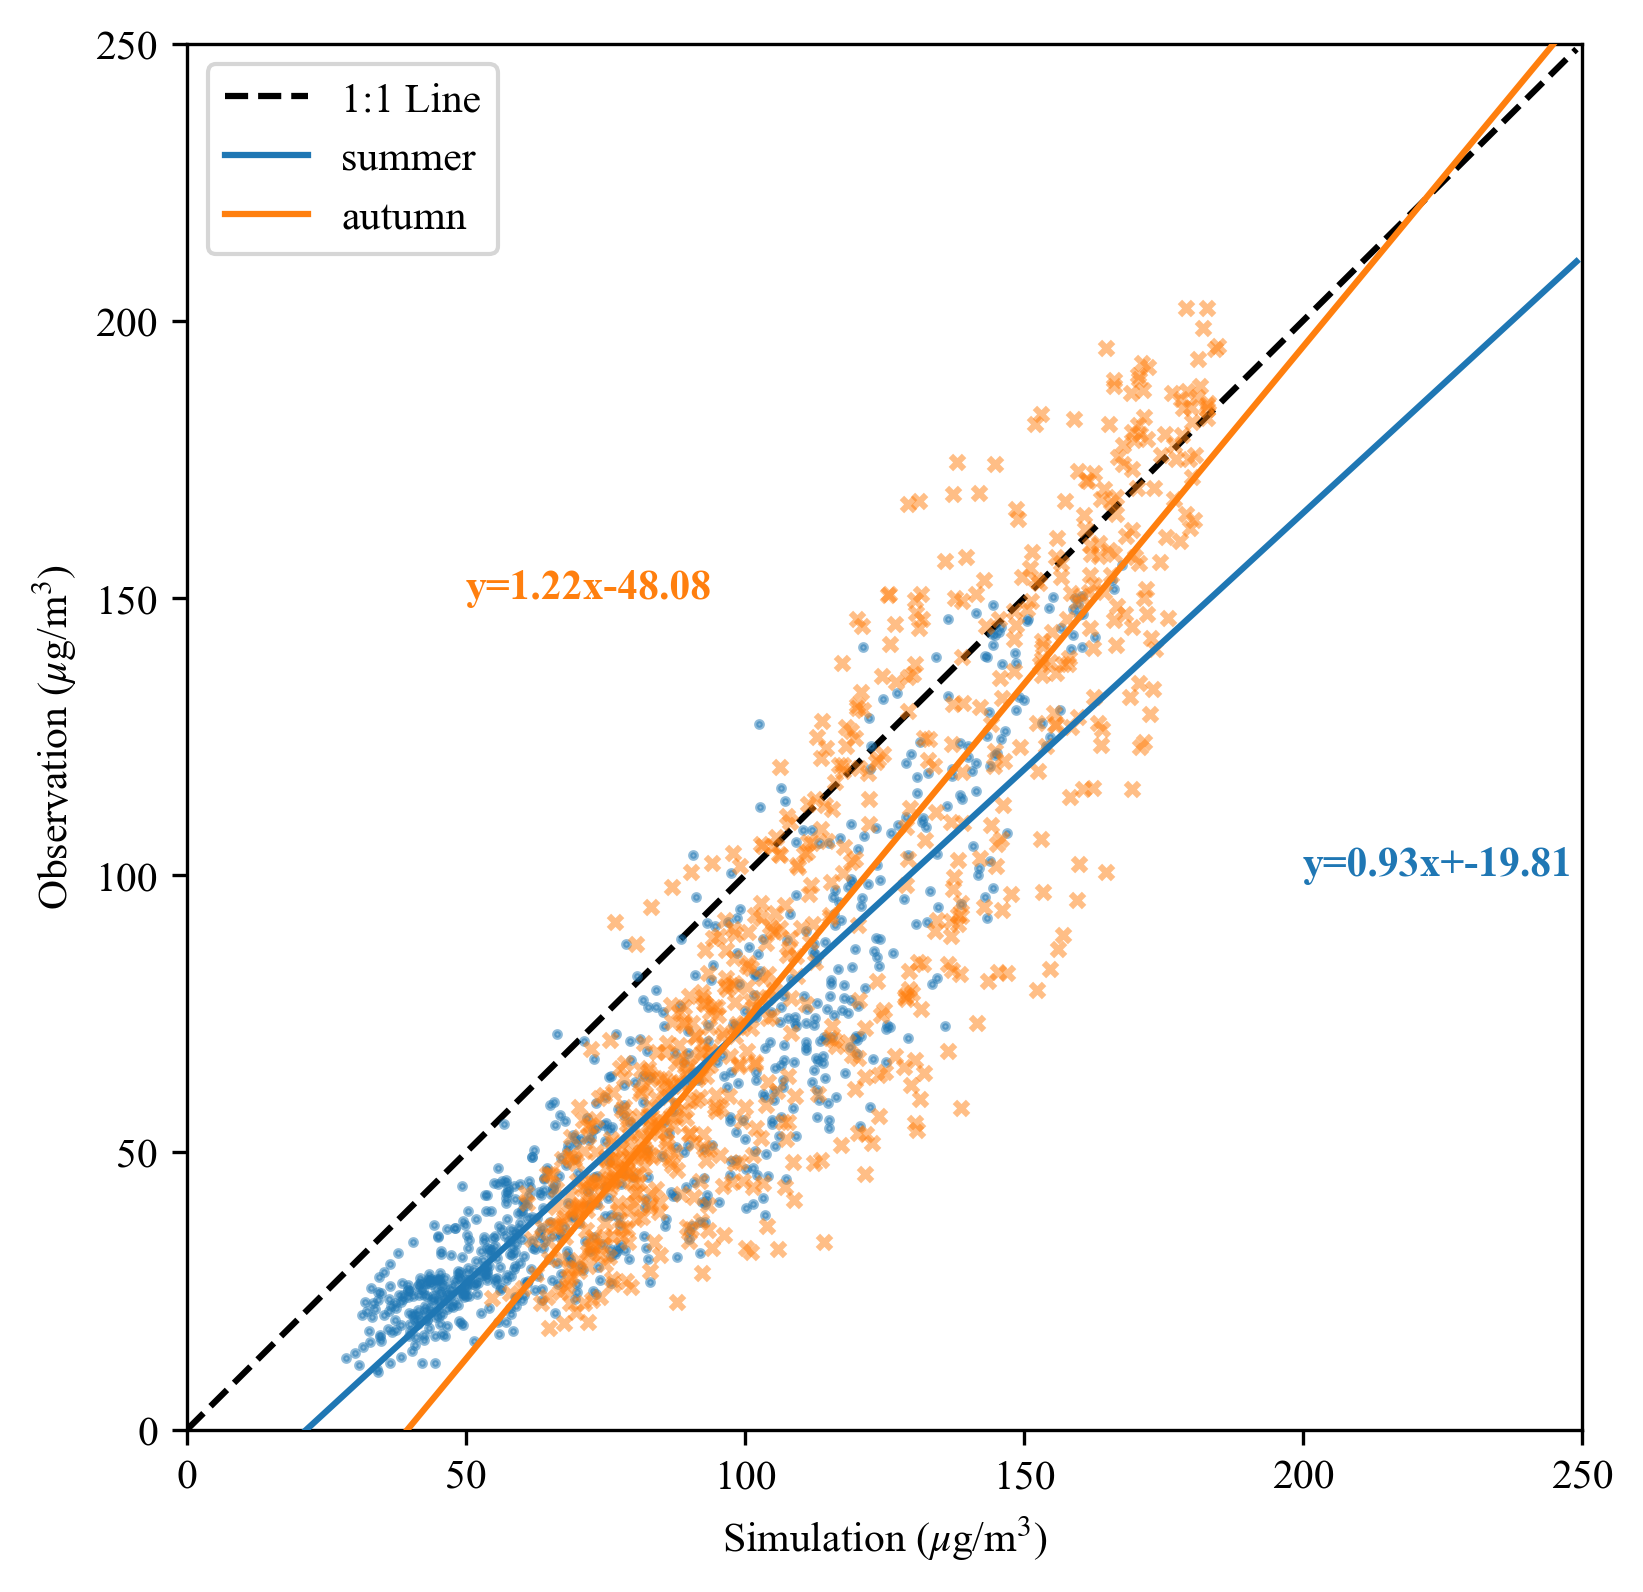

In [11]:
strdict = {'weight':'bold'}

fig = plt.figure(figsize=(6, 6),dpi=300)
ax = fig.add_subplot(111)
ax.plot(np.arange(0,250),np.arange(0,250),'k--',zorder=0,label='1:1 Line')
slope = lr['summer']['slope']
intercept = lr['summer']['intercept']
ax.plot(np.arange(0,250),slope*np.arange(0,250)+intercept,color='tab:blue',zorder=4,label='summer')
ax.text(200,100,s=f'y={slope:.2f}x+{intercept:.2f}',color='tab:blue',fontdict=strdict)
slope = lr['autumn']['slope']
intercept = lr['autumn']['intercept']
ax.plot(np.arange(0,250),slope*np.arange(0,250)+intercept,color='tab:orange',zorder=4,label='autumn')
ax.text(50,150,s=f'y={slope:.2f}x{intercept:.2f}',color='tab:orange',fontdict=strdict)

ax.scatter(sim_summer.values, obs_summer.values,color='tab:blue',s=10, marker='.',alpha=0.5)
ax.scatter(sim_autumn.values, obs_autumn.values,color='tab:orange',s=10, marker='x',alpha=0.5)
ax.set_xlim(0,250)
ax.set_ylim(0,250)
ax.set_xlabel('Simulation ($\mu$g/m$^3$)')
ax.set_ylabel('Observation ($\mu$g/m$^3$)')
ax.legend()
plt.show()

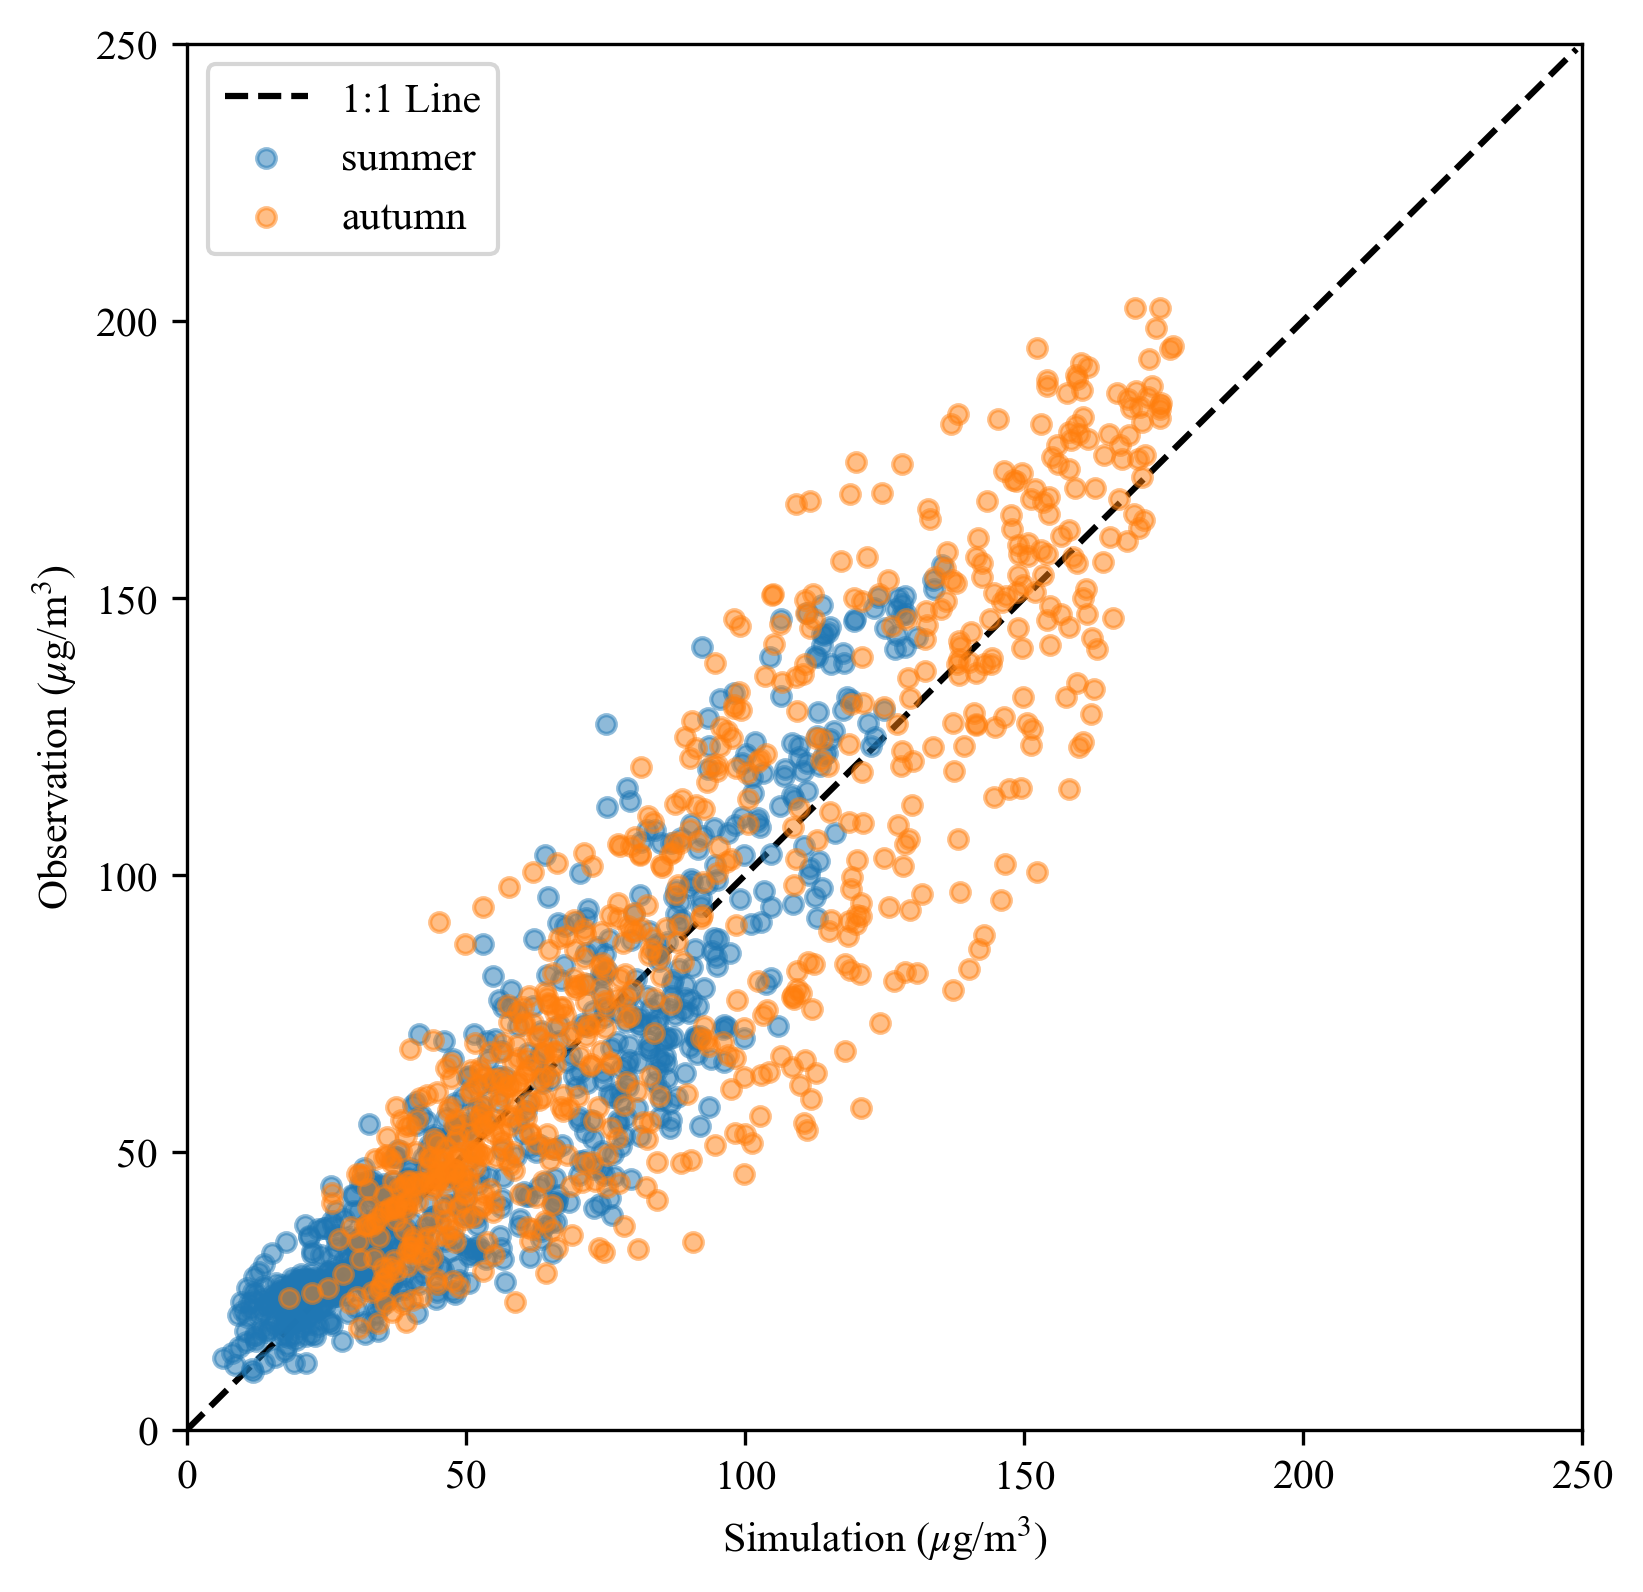

In [12]:
fig = plt.figure(figsize=(6, 6),dpi=300)
ax = fig.add_subplot(111)
ax.plot(np.arange(0,250),np.arange(0,250),'k--',zorder=0,label='1:1 Line')

slope = lr['summer']['slope']
intercept = lr['summer']['intercept']
ax.scatter(sim_summer.values*slope+intercept, obs_summer.values,label='summer',color='tab:blue',s=20, marker='o',alpha=0.5)
slope = lr['autumn']['slope']
intercept = lr['autumn']['intercept']
ax.scatter(sim_autumn.values*slope+intercept, obs_autumn.values,label='autumn',color='tab:orange',s=20, marker='o',alpha=0.5)

ax.set_xlim(0,250)
ax.set_ylim(0,250)
ax.set_xlabel('Simulation ($\mu$g/m$^3$)')
ax.set_ylabel('Observation ($\mu$g/m$^3$)')
ax.legend()
plt.show()

目前结果不够理想，主要原因是summer的模拟结果偏高太多了\
下面对summer用summer的回归，autumn用autumn的回归，sen用summer的回归（考虑是因为summer的排放源导致偏高，所以这里用summer回归）

In [13]:
obs_summer_value = avg_summer[obs_list].mean()
obs_autumn_value = avg_autumn[obs_list].mean()

slope            = lr['summer']['slope']
intercept        = lr['summer']['intercept']
sim_summer_value = avg_summer[sim_list].mean() * slope + intercept
sen_autumn_value = avg_sensit[sen_list].mean() * slope + intercept

slope            = lr['autumn']['slope']
intercept        = lr['autumn']['intercept']
sim_autumn_value = avg_autumn[sim_list].mean() * slope + intercept

print('obs summer :',obs_summer_value)
print('obs autumn :',obs_autumn_value)
print('sim summer :',sim_summer_value)
print('sim autumn :',sim_autumn_value)
print('sen autumn :',sen_autumn_value)

obs summer : 94.60311566796946
obs autumn : 146.9734766306779
sim summer : 93.35274220110978
sim autumn : 141.50869571085016
sen autumn : 125.58542222229543


In [14]:
delta_obs      = obs_autumn_value - obs_summer_value
sen_del_summer = sen_autumn_value - sim_summer_value
autumn_del_sen = sim_autumn_value - sen_autumn_value

print('ΔMET + ΔEMIS = {:.2f}'.format(delta_obs),
      '\nΔMET = {:.2f}'.format(sen_del_summer),', {:.2f}%'.format(sen_del_summer/delta_obs*100),
      '\nΔEMIS = {:.2f}'.format(autumn_del_sen),', {:.2f}%'.format(autumn_del_sen/delta_obs*100))

ΔMET + ΔEMIS = 52.37 
ΔMET = 32.23 , 61.55% 
ΔEMIS = 15.92 , 30.41%


如果sen用autumn的回归，结果会不太好

### 输出计算的结果

In [15]:
obs_summer = avg_summer[obs_list].mean()
obs_autumn = avg_autumn[obs_list].mean()
sim_summer = avg_summer[sim_list].mean()
sim_autumn = avg_autumn[sim_list].mean()
sen_autumn = avg_sensit[sen_list].mean()

dfout = pd.DataFrame(
    index=['obs_summer','obs_autumn','sim_summer','sim_autumn','sen_autumn'],
    columns=['original','lr_by_summer','lr_by_autumn',],
)

dfout['original'] = [obs_summer,obs_autumn,sim_summer,sim_autumn,sen_autumn]
dfout['lr_by_summer'] = [np.nan,np.nan,sim_summer_value,np.nan,sen_autumn_value]
dfout['lr_by_autumn'] = [np.nan,np.nan,np.nan,sim_autumn_value,np.nan]
dfout

,original,lr_by_summer,lr_by_autumn
obs_summer,94.603116,NaN,NaN
obs_autumn,146.973477,NaN,NaN
sim_summer,122.250282,93.352742,NaN
sim_autumn,155.782640,NaN,141.508696
sen_autumn,157.069917,125.585422,NaN


In [16]:
dfout.to_excel('D:/data/Graduation/Contribution/Seasonally/lr_results_Seasonally.xlsx',index=True)